# 1. Presentation of the problem

We want to analyze a diverse range of attributes, including acidity, sugar content, pH levels, and more, to unravel hidden patterns and relationships within the dataset. Through this analysis, we anticipate gaining valuable insights into the factors that contribute to high-quality wines. By employing our model, we can accurately predict wine quality, enabling winemakers to optimize production processes and enthusiasts to make informed selections.

In [1]:
# Python ≥3.9 is required
import sys
assert sys.version_info >= (3, 9)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

# Statistical analysis and testing
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# import data
wine_data = pd.read_csv(r'/Users/thaonguyen/Downloads/Machine learning/bt Long/WineQT.csv')

# 2. Data exploration

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
wine_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
987,8.000,0.640,0.220,2.400,0.094,5.000,33.000,0.996,3.370,0.580,11.000,5,1391
879,8.300,0.560,0.220,2.400,0.082,10.000,86.000,0.998,3.370,0.620,9.500,5,1243
219,8.400,0.650,0.600,2.100,0.112,12.000,90.000,0.997,3.200,0.520,9.200,5,304
889,6.800,0.640,0.000,2.700,0.123,15.000,33.000,0.995,3.440,0.630,11.300,6,1258
643,9.300,0.380,0.480,3.800,0.132,3.000,11.000,0.996,3.230,0.570,13.200,6,910


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.311,0.531,0.268,2.532,0.087,15.615,45.915,0.997,3.311,0.658,10.442,5.657,804.969
std,1.748,0.180,0.197,1.356,0.047,10.250,32.782,0.002,0.157,0.170,1.082,0.806,463.997
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.393,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000,411.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000,794.000
75%,9.100,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000,1209.500
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


In [6]:
# drop density as all values are similar, id is only for label
wine_data.drop(["Id", "density"], axis=1, inplace=True)

In [7]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,3.510,0.560,9.400,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.300,0.510,0.130,2.300,0.076,29.000,40.000,3.420,0.750,11.000,6
1139,6.800,0.620,0.080,1.900,0.068,28.000,38.000,3.420,0.820,9.500,6
1140,6.200,0.600,0.080,2.000,0.090,32.000,44.000,3.450,0.580,10.500,5
1141,5.900,0.550,0.100,2.200,0.062,39.000,51.000,3.520,0.760,11.200,6


In [8]:
wine_data.groupby('quality')['quality'].agg('count')

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

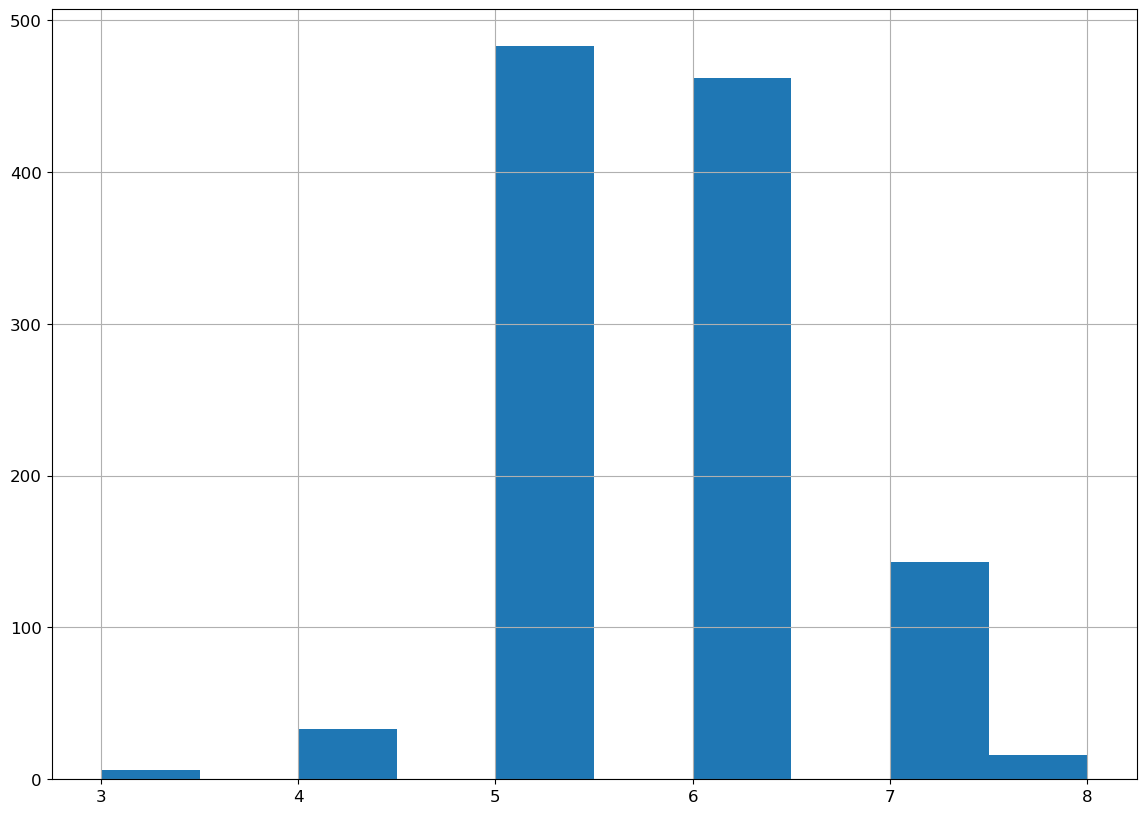

In [9]:
wine_data.quality.hist(bins=10, figsize=(14,10))
plt.show()

In [10]:
#split data

from sklearn.model_selection import StratifiedShuffleSplit


splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(wine_data, wine_data.quality):
    train_set = wine_data.loc[train_index]
    test_set = wine_data.loc[test_index]
    
train_set.quality.value_counts() / len(train_set)


5   0.422
6   0.405
7   0.125
4   0.028
8   0.014
3   0.005
Name: quality, dtype: float64

In [11]:
train_set.shape, test_set.shape

((914, 11), (229, 11))

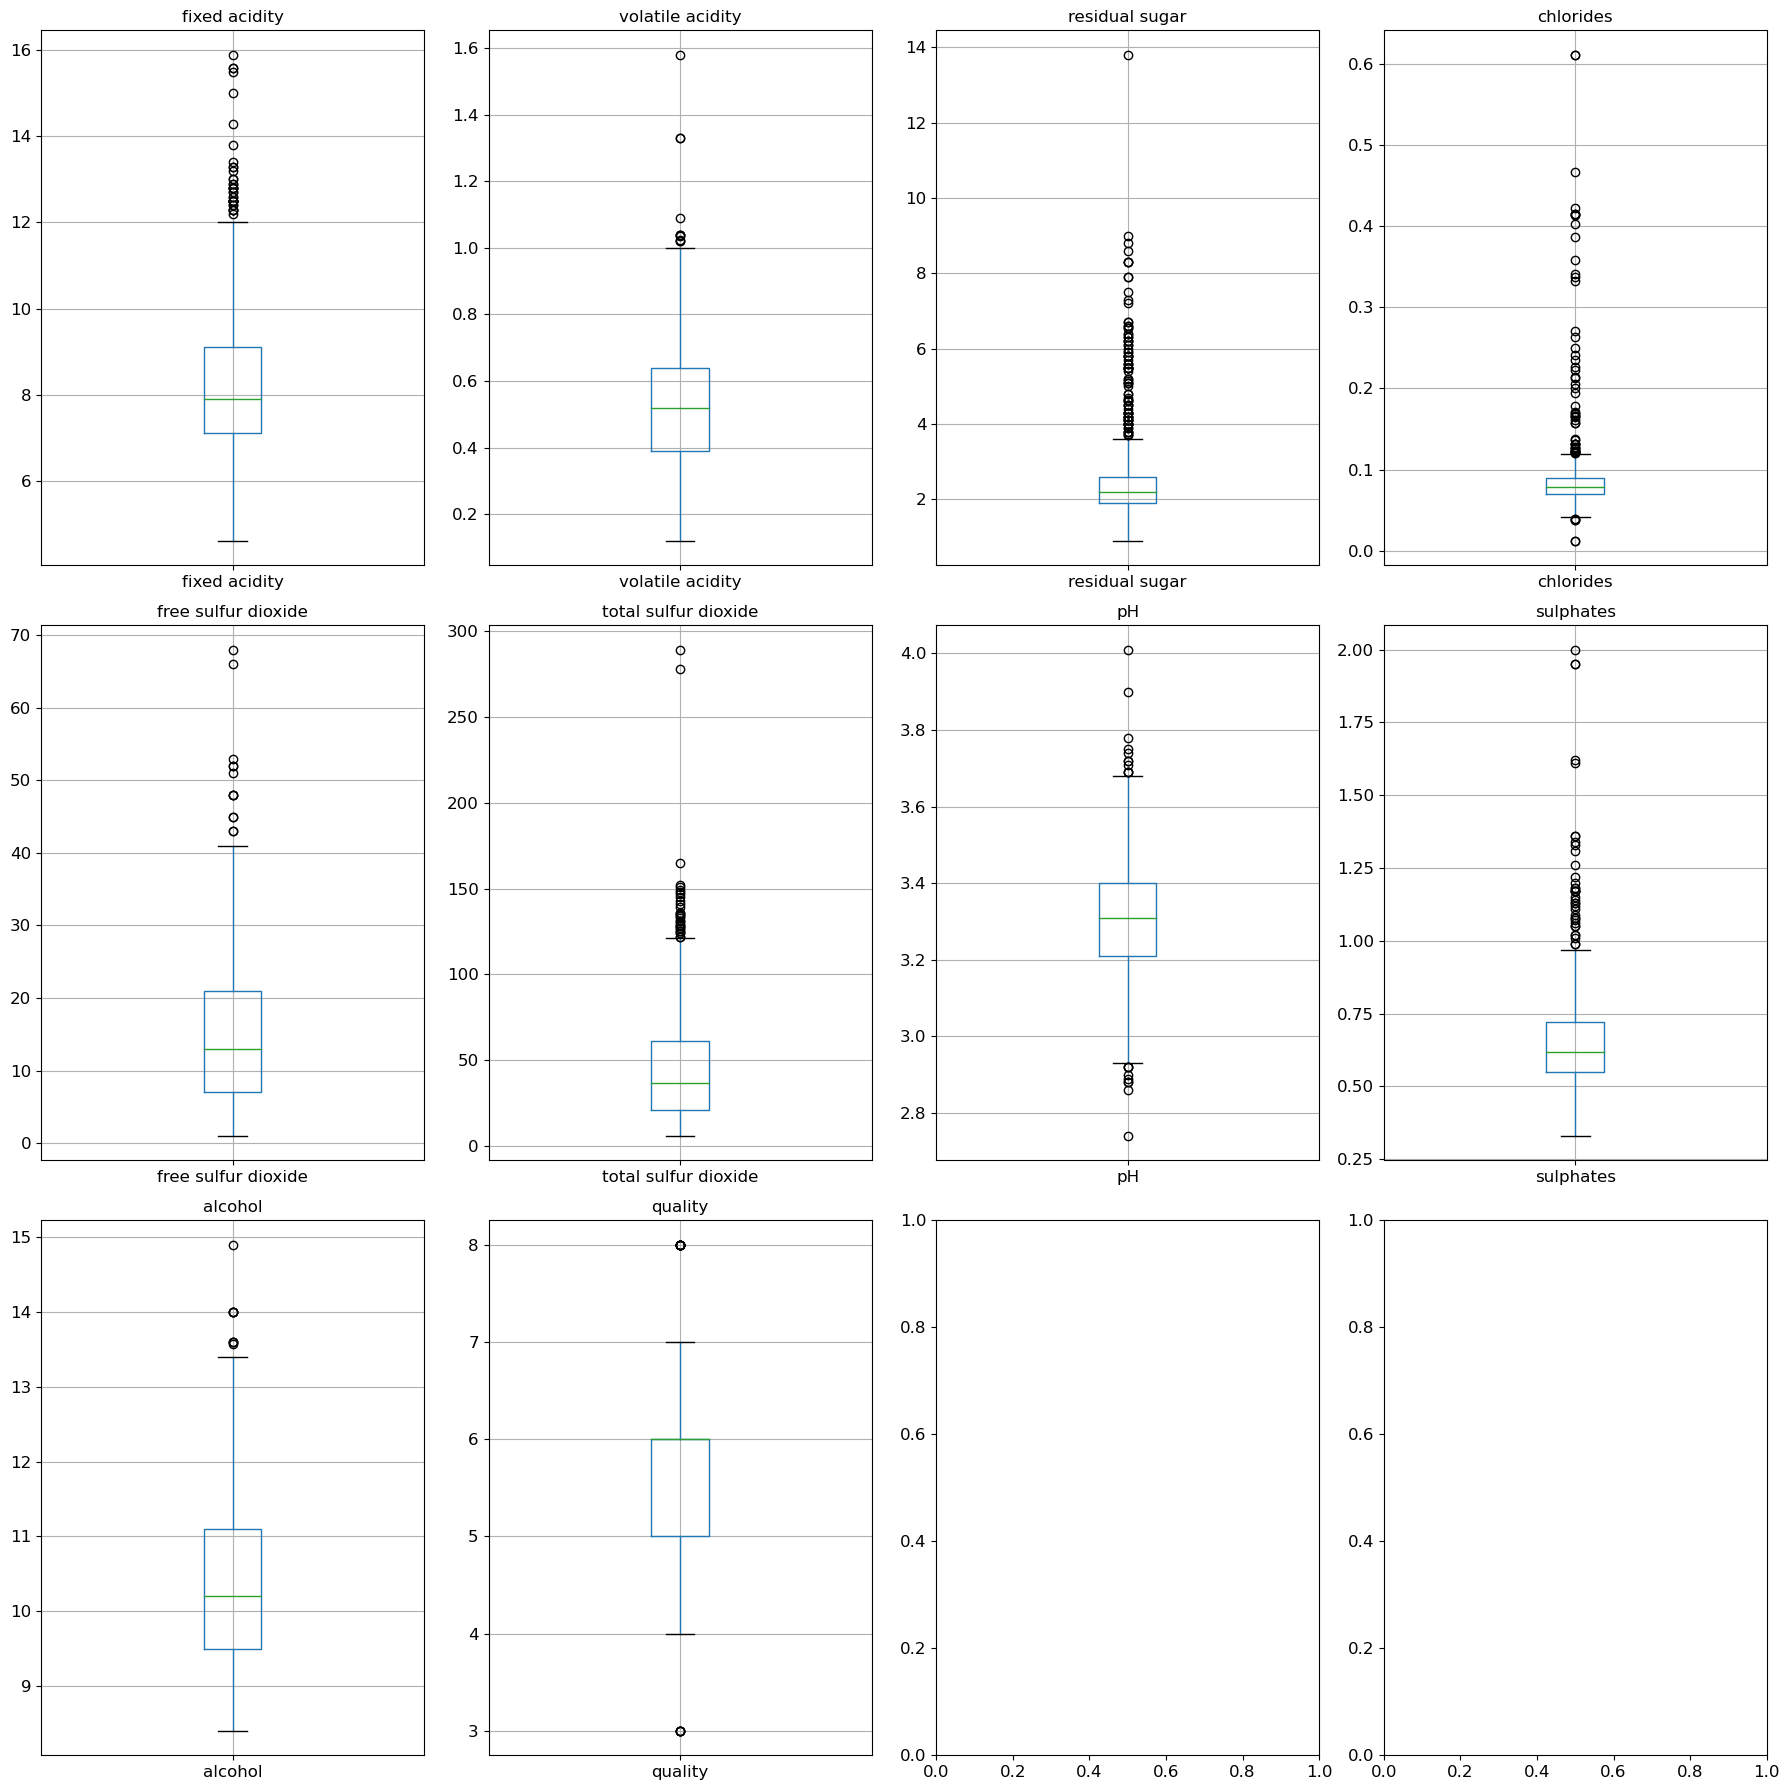

In [12]:
# outliers
features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'pH',
            'sulphates', 'alcohol', 'quality']


fig, axes = plt.subplots(3, 4, figsize=(18, 18))
axes = axes.ravel()

for i, feature in enumerate(features):
    train_set.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


In [13]:
#correlation

corr_matrix = train_set.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000
alcohol                 0.482
sulphates               0.245
citric acid             0.233
fixed acidity           0.114
residual sugar          0.040
free sulfur dioxide    -0.046
pH                     -0.067
chlorides              -0.129
total sulfur dioxide   -0.156
volatile acidity       -0.402
Name: quality, dtype: float64

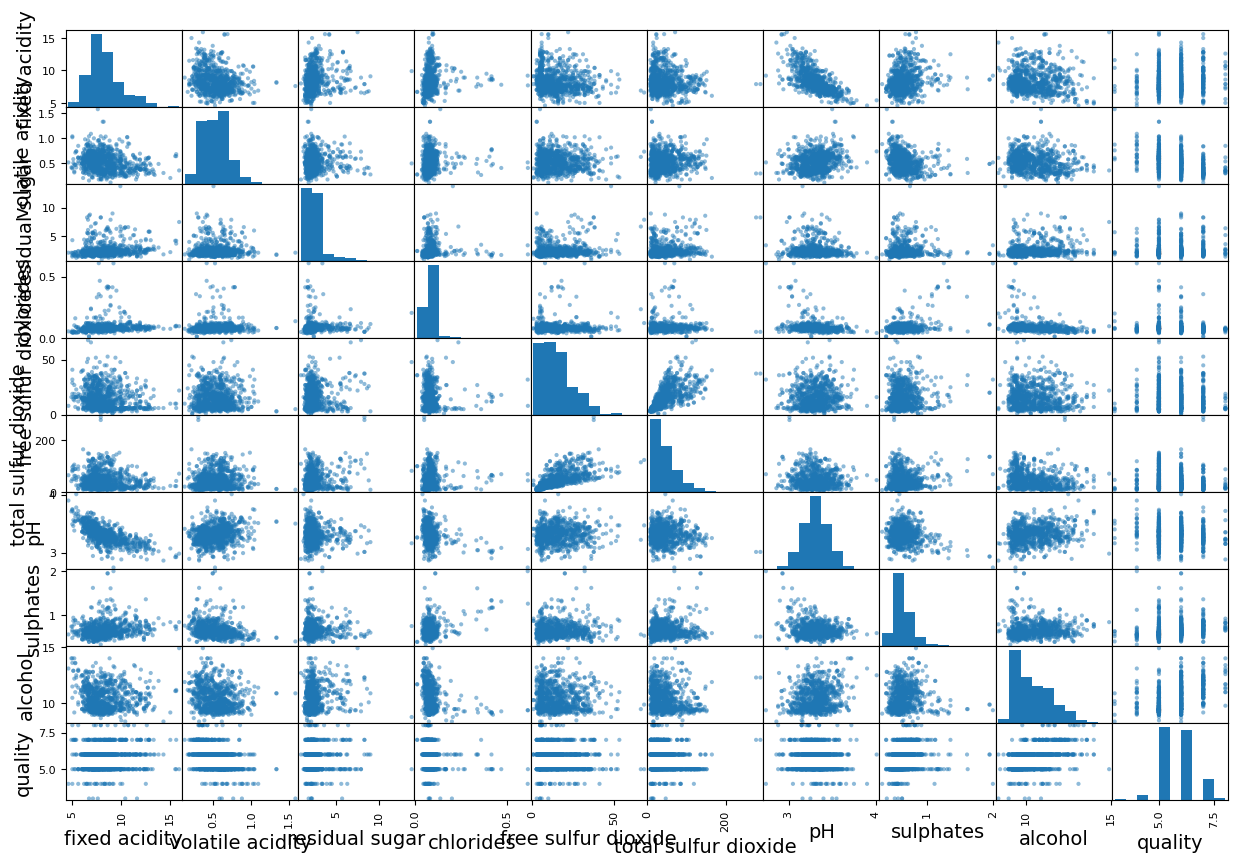

In [14]:
attributes = [
    'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'pH',
            'sulphates', 'alcohol', 'quality'
]
pd.plotting.scatter_matrix(
    train_set[attributes], figsize=(15, 10)
)
plt.show()

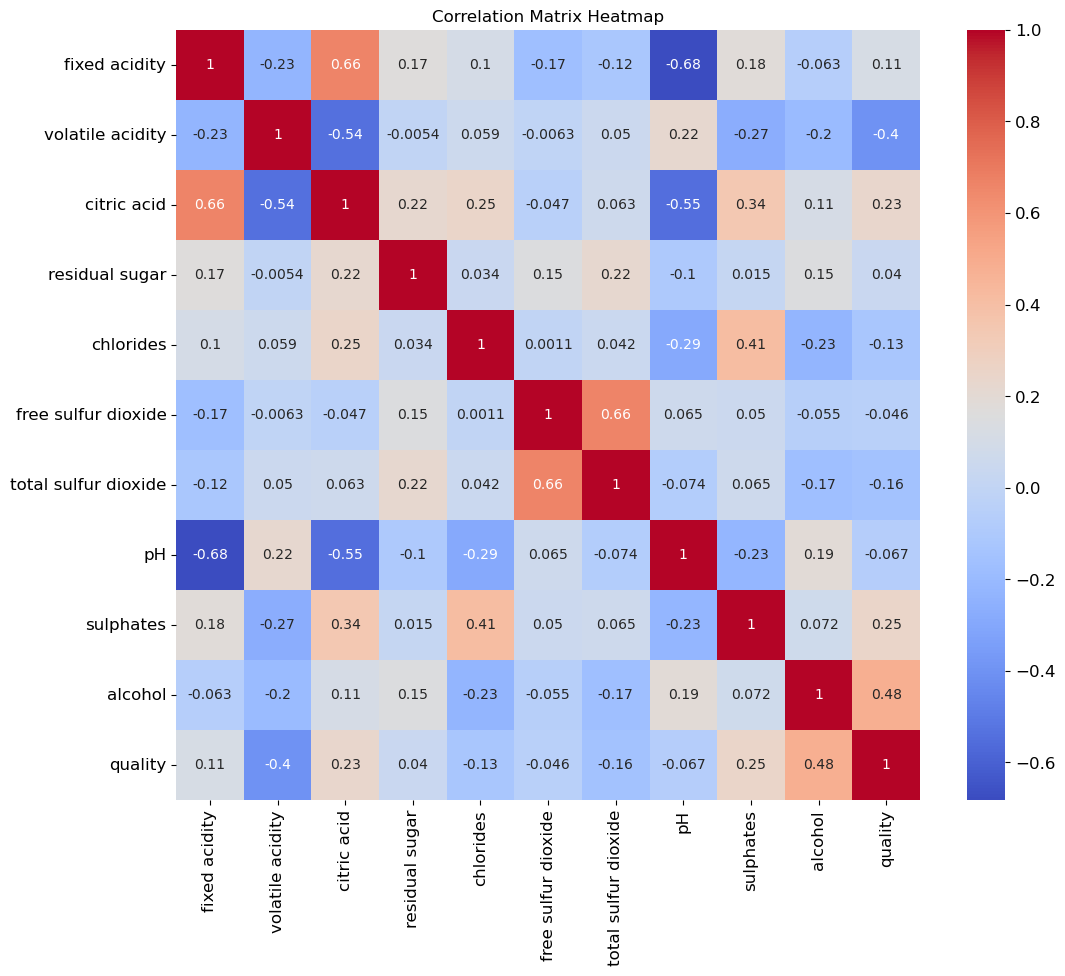

In [15]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# 3. Data Preparation

In [16]:
# Check for missing values in the training set
missing_values = train_set.isnull().sum()
print("Missing values in training set:\n", missing_values)


Missing values in training set:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


there is no missing value so do not need to fill and also no category feature so do not need to encode

In [17]:
scaler = StandardScaler()
target = "quality"
x_train = train_set.drop(target, axis=1)
y_train = train_set[target]
x_test = test_set.drop(target, axis=1)
y_test = test_set[target]

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# 4. Model selection

While the wine quality score is between 0-10, in this dataset, we only have 6 scores with an imbalance distribution (most of the data has 5-6 quality scores). This case can be considered as a classification request based on the categorical target data. However, because the dataset only has 6 categories, the classification model will be unable to predict the other category which doesn't appear in this dataset.

The target (quality score) is ordinal and numerical (score from 0-10). In this case, we can also treat it as a regression problem. We can fit regression algorithms to the corresponding interval/ratio value that can be mapped to the actual ordinal value.

In order to compare two different ways to approach this situation, **RandomForest Classifier** and **Support Vector Machine Regression** model have been used to evaluate and compare their performance on the anticipation test set.

In [18]:
#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=200, random_state=42)
clf.fit(x_train, y_train)

# Apply on the test set
y_predict = clf.predict(x_test)

for i, j in zip(y_test, y_predict):
    print("Actual {} Predicted {}".format(i,j))

Actual 6 Predicted 6
Actual 5 Predicted 5
Actual 5 Predicted 5
Actual 5 Predicted 5
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 4 Predicted 5
Actual 5 Predicted 5
Actual 5 Predicted 5
Actual 7 Predicted 6
Actual 6 Predicted 6
Actual 7 Predicted 6
Actual 5 Predicted 5
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 5 Predicted 6
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 5 Predicted 5
Actual 8 Predicted 6
Actual 5 Predicted 5
Actual 5 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 5
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 7 Predicted 7
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 7 Predicted 7
Actual 6 Predicted 6
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 6
Actual 6 Predicted 5
Actual 5 Predicted 5
Actual 5 Predicted 5
Actual 6 Predicted 6
Actual 7 Predicted 6
Actual 6 Predicted 6
Actual 6 Pred

In [19]:
# Evaluate the performance of model on the test set:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, labels=[ 3, 4, 5, 6, 7, 8]))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.84      0.77        97
           6       0.68      0.71      0.69        92
           7       0.75      0.52      0.61        29
           8       0.00      0.00      0.00         3

    accuracy                           0.70       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.67      0.70      0.68       229



/Users/thaonguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thaonguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thaonguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is clear to see that, while the accuracy is 0.7, the Random Forest Classifier model couldn't predict the label (score) which has small training data (score 3, 4, and 8 - with 0 precision). Besides, one of the disadvantages of this classification model is losing the ordering information of each class because the classification algorithm treats each class as a set of unordered values.

In [20]:
from sklearn.svm import SVR
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(x_train, y_train)

#Apply model to test set:
y_predict_reg = regr.predict(x_test)

for i, j in zip(y_test, y_predict_reg):
    print("Actual {} Predicted {}".format(i,j))

Actual 6 Predicted 6.46351527743712
Actual 5 Predicted 4.954194947138929
Actual 5 Predicted 5.5641183045139275
Actual 5 Predicted 5.005884491581896
Actual 5 Predicted 5.695899739377974
Actual 6 Predicted 5.7452789940301985
Actual 6 Predicted 5.289068606171286
Actual 6 Predicted 6.44746310934171
Actual 6 Predicted 6.363585776265862
Actual 4 Predicted 5.026602032301852
Actual 5 Predicted 5.331315786869497
Actual 5 Predicted 4.797663397196592
Actual 7 Predicted 6.347423085473928
Actual 6 Predicted 5.918391371340384
Actual 7 Predicted 6.449297352333275
Actual 5 Predicted 5.0570649609438405
Actual 5 Predicted 5.188827404582187
Actual 6 Predicted 6.5450499845364964
Actual 5 Predicted 5.911867352417875
Actual 5 Predicted 5.277385457400484
Actual 6 Predicted 6.303233872225036
Actual 5 Predicted 5.301038092270181
Actual 8 Predicted 5.828610695289559
Actual 5 Predicted 5.153719575110377
Actual 5 Predicted 5.611184885335318
Actual 6 Predicted 5.428148559113706
Actual 6 Predicted 6.293033326056233

In [21]:
#Evaluate performance:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE {}".format(mean_absolute_error(y_test, y_predict_reg)))
print("MSE {}".format(mean_squared_error(y_test, y_predict_reg)))
print("R2 {}".format(r2_score(y_test, y_predict_reg)))

MAE 0.45231000758651224
MSE 0.36904040269702665
R2 0.428005918371024


In terms of support vector machine regression, it is shown the small Mean Squared Error and small Mean Absolute Error, which is acceptable. This model can also solve the problem about the ordering information of each class, which Classifier model couldn't. However, the r2 score is quite low, which shown that the model seems doesn't fit very well in this case.

# 4. Conclusion commenting on the results and comparing the models

**RandomForestClassifier**:
- Advantage: Acceptable accurary (0.7). Pretty high presicion and recall with lables having large training data (score 5 and score 6)
- Disadvantage: Losing the ordering information of each class because the classification algorithm treats each class as a set of unordered values

**Support Vector Machine Regression:**
- Advantage: Small Mean Squared Error and small Mean Absolute Error (acceptable), solved the problem about the ordering information of each class
- Disadvantage: Low R2 score => this model doesn't very fit well